<a href="https://colab.research.google.com/github/Diacod-I/BourneToKill/blob/main/BioInfo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%javascript
function ClickConnect(){
console.log("Working");
document.querySelector("colab-toolbar-button#connect").click()
}setInterval(ClickConnect,60000)

<IPython.core.display.Javascript object>

# Monoamine Oxidase A

## Installation of the CHEMBL client

In [6]:
!pip install chembl_webresource_client

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 KB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 KB 6.1 MB/s eta 0:00:00
  Attempting uninstall: attrs
    Found existing installation: attrs 22.2.0
    Uninstalling attrs-22.2.0:
      Successfully uninstalled attrs-22.2.0


In [ ]:
from chembl_webresource_client.new_client import new_client

## Importing Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import ast

## Searching for Target Protein MAO-A

In [ ]:
target = new_client.target
target_query = target.search('MAOA')
queries = pd.DataFrame.from_dict(target_query)
queries

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'P21397', 'xref_name': None, 'xre...",Homo sapiens,Monoamine oxidase A,15.0,False,CHEMBL1951,"[{'accession': 'P21397', 'component_descriptio...",SINGLE PROTEIN,9606
1,"[{'xref_id': 'P21398', 'xref_name': None, 'xre...",Bos taurus,Monoamine oxidase A,15.0,False,CHEMBL3254,"[{'accession': 'P21398', 'component_descriptio...",SINGLE PROTEIN,9913
2,"[{'xref_id': 'P21396', 'xref_name': None, 'xre...",Rattus norvegicus,Monoamine oxidase A,15.0,False,CHEMBL3358,"[{'accession': 'P21396', 'component_descriptio...",SINGLE PROTEIN,10116
3,"[{'xref_id': 'NBK23217', 'xref_name': 'Monoami...",Mus musculus,Monoamine oxidase A,15.0,False,CHEMBL3681,"[{'accession': 'Q64133', 'component_descriptio...",SINGLE PROTEIN,10090
4,[],Rattus norvegicus,Monoamine oxidase,13.0,False,CHEMBL2095196,"[{'accession': 'P19643', 'component_descriptio...",PROTEIN FAMILY,10116
5,[],Homo sapiens,Monoamine oxidase,13.0,False,CHEMBL2095205,"[{'accession': 'P21397', 'component_descriptio...",PROTEIN FAMILY,9606
6,[],Mus musculus,Monoamine oxidase,13.0,False,CHEMBL2111442,"[{'accession': 'Q8BW75', 'component_descriptio...",PROTEIN FAMILY,10090
7,[],Bos taurus,Monoamine oxidase,13.0,False,CHEMBL2111399,"[{'accession': 'P56560', 'component_descriptio...",PROTEIN FAMILY,9913


In [ ]:
MaOA = queries.target_chembl_id[0]
MaOA

Now the following shows the retrieval of bioactivity data for Monoamine oxidase A from ChemBL

In [ ]:
activity = new_client.activity
bio = activity.filter(target_chembl_id=MaOA).filter(standard_type='IC50')

In [ ]:
biodf = pd.DataFrame.from_dict(bio)

In [ ]:
biodf.head()

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,184068,[],CHEMBL715193,Compound was tested for inhibition of monoamin...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Monoamine oxidase A,9606,None,None,IC50,uM,UO_0000065,None,5.47
1,None,185442,[],CHEMBL715193,Compound was tested for inhibition of monoamin...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Monoamine oxidase A,9606,None,None,IC50,uM,UO_0000065,None,1.36
2,None,189322,[],CHEMBL715193,Compound was tested for inhibition of monoamin...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Monoamine oxidase A,9606,None,None,IC50,uM,UO_0000065,None,30.8
3,None,190494,[],CHEMBL715193,Compound was tested for inhibition of monoamin...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Monoamine oxidase A,9606,None,None,IC50,uM,UO_0000065,None,22.5
4,None,191747,[],CHEMBL715193,Compound was tested for inhibition of monoamin...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Monoamine oxidase A,9606,None,None,IC50,uM,UO_0000065,None,0.18


In [ ]:
biodf.standard_type.unique()

array(['IC50'], dtype=object)

In [ ]:
biodf.to_csv('bioactivityMAO-A.csv',index=False)

In [ ]:
biodf[biodf['target_organism']=='Homo sapiens']['assay_description'].unique()

## Dataframed Dataset

In [2]:
!head "/content/bioactivityMAO-A.csv"

activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
,184068,[],CHEMBL715193,Compound was tested for inhibition of monoamine oxidase-A (MAO-A).,B,,,BAO_0000190,BAO_0000357,single protein format,C/N=C1/CCc2c1n(C)c1ccc(OC(=O)NCc3ccccc3)c(Br)c21,,,CHEMBL1151505,Bioorg Med Chem Lett,1996.0,"{'bei': '12.34', 'le': '0.27', 'lle': '0.67', 'sei': '9.46'}",CHEMBL156630,,CHEMBL15663

In [3]:
biocsv = pd.read_csv("/content/bioactivityMAO-A.csv")

In [4]:
biocsv = biocsv[biocsv.standard_value.notna()].drop('activity_comment',axis=1)

In [5]:
biocsv[biocsv.bao_label=='single protein format'].head()

,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,184068,[],CHEMBL715193,Compound was tested for inhibition of monoamin...,B,NaN,NaN,BAO_0000190,BAO_0000357,single protein format,...,Homo sapiens,Monoamine oxidase A,9606.0,NaN,NaN,IC50,uM,UO_0000065,NaN,5.47
1,185442,[],CHEMBL715193,Compound was tested for inhibition of monoamin...,B,NaN,NaN,BAO_0000190,BAO_0000357,single protein format,...,Homo sapiens,Monoamine oxidase A,9606.0,NaN,NaN,IC50,uM,UO_0000065,NaN,1.36
2,189322,[],CHEMBL715193,Compound was tested for inhibition of monoamin...,B,NaN,NaN,BAO_0000190,BAO_0000357,single protein format,...,Homo sapiens,Monoamine oxidase A,9606.0,NaN,NaN,IC50,uM,UO_0000065,NaN,30.80
3,190494,[],CHEMBL715193,Compound was tested for inhibition of monoamin...,B,NaN,NaN,BAO_0000190,BAO_0000357,single protein format,...,Homo sapiens,Monoamine oxidase A,9606.0,NaN,NaN,IC50,uM,UO_0000065,NaN,22.50
4,191747,[],CHEMBL715193,Compound was tested for inhibition of monoamin...,B,NaN,NaN,BAO_0000190,BAO_0000357,single protein format,...,Homo sapiens,Monoamine oxidase A,9606.0,NaN,NaN,IC50,uM,UO_0000065,NaN,0.18


In [6]:
biocsv.columns

Index(['activity_id', 'activity_properties', 'assay_chembl_id',
       'assay_description', 'assay_type', 'assay_variant_accession',
       'assay_variant_mutation', 'bao_endpoint', 'bao_format', 'bao_label',
       'canonical_smiles', 'data_validity_comment',
       'data_validity_description', 'document_chembl_id', 'document_journal',
       'document_year', 'ligand_efficiency', 'molecule_chembl_id',
       'molecule_pref_name', 'parent_molecule_chembl_id', 'pchembl_value',
       'potential_duplicate', 'qudt_units', 'record_id', 'relation', 'src_id',
       'standard_flag', 'standard_relation', 'standard_text_value',
       'standard_type', 'standard_units', 'standard_upper_value',
       'standard_value', 'target_chembl_id', 'target_organism',
       'target_pref_name', 'target_tax_id', 'text_value', 'toid', 'type',
       'units', 'uo_units', 'upper_value', 'value'],
      dtype='object')

The SMILES Notation represents molecule structural information.

In [7]:
biocsv.canonical_smiles.head()

0    C/N=C1/CCc2c1n(C)c1ccc(OC(=O)NCc3ccccc3)c(Br)c21
1            C/N=C1/CCc2c1n(C)c1ccc(OC(=O)NC)c(Cl)c21
2                      CC(C)/N=C1/CCc2c1n(C)c1ccccc21
3            C/N=C1/CCc2c1n(C)c1cc(Cl)c(OC(=O)NC)cc21
4                       COc1cc(Br)c2oc(C3CCNCC3)cc2c1
Name: canonical_smiles, dtype: object

In [8]:
biocsv.standard_units.unique()

array(['nM'], dtype=object)

In [9]:
print("Total number of ChemBL molecule IDs:",biocsv.molecule_chembl_id.count())

Total number of ChemBL molecule IDs: 1244


In [10]:
print("Unique number of ChemBL molecule IDs:",len(biocsv.molecule_chembl_id.unique()))

Unique number of ChemBL molecule IDs: 1052


Now time to categorize the molecules based on its standard value.<br> We have extracted data based on the IC<sub>50</sub> (half-maximal inhibitory concentration) type, which is a conventional measure used to check the inhibitory potency of a drug on a target.<br>On the basis of IC<sub>50</sub>, the inhibitory concentration will considered the classifying feature, and so we will consider drugs with 1000 nM and below to be ***'Active'*** drugs, drugs with 10,000 nM and above to be ***'Inactive'*** and the drugs that lies in between to be ***'Intermediate'***.

In [11]:
nanoclassed = biocsv[biocsv.standard_units=='nM']
nanoclassed.head()

,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,184068,[],CHEMBL715193,Compound was tested for inhibition of monoamin...,B,NaN,NaN,BAO_0000190,BAO_0000357,single protein format,...,Homo sapiens,Monoamine oxidase A,9606.0,NaN,NaN,IC50,uM,UO_0000065,NaN,5.47
1,185442,[],CHEMBL715193,Compound was tested for inhibition of monoamin...,B,NaN,NaN,BAO_0000190,BAO_0000357,single protein format,...,Homo sapiens,Monoamine oxidase A,9606.0,NaN,NaN,IC50,uM,UO_0000065,NaN,1.36
2,189322,[],CHEMBL715193,Compound was tested for inhibition of monoamin...,B,NaN,NaN,BAO_0000190,BAO_0000357,single protein format,...,Homo sapiens,Monoamine oxidase A,9606.0,NaN,NaN,IC50,uM,UO_0000065,NaN,30.80
3,190494,[],CHEMBL715193,Compound was tested for inhibition of monoamin...,B,NaN,NaN,BAO_0000190,BAO_0000357,single protein format,...,Homo sapiens,Monoamine oxidase A,9606.0,NaN,NaN,IC50,uM,UO_0000065,NaN,22.50
4,191747,[],CHEMBL715193,Compound was tested for inhibition of monoamin...,B,NaN,NaN,BAO_0000190,BAO_0000357,single protein format,...,Homo sapiens,Monoamine oxidase A,9606.0,NaN,NaN,IC50,uM,UO_0000065,NaN,0.18


In [12]:
nanoclassed[nanoclassed.standard_value<1000].head()

,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
4,191747,[],CHEMBL715193,Compound was tested for inhibition of monoamin...,B,NaN,NaN,BAO_0000190,BAO_0000357,single protein format,...,Homo sapiens,Monoamine oxidase A,9606.0,NaN,NaN,IC50,uM,UO_0000065,NaN,0.18
9,195163,[],CHEMBL715193,Compound was tested for inhibition of monoamin...,B,NaN,NaN,BAO_0000190,BAO_0000357,single protein format,...,Homo sapiens,Monoamine oxidase A,9606.0,NaN,NaN,IC50,uM,UO_0000065,NaN,0.75
12,204730,[],CHEMBL715193,Compound was tested for inhibition of monoamin...,B,NaN,NaN,BAO_0000190,BAO_0000357,single protein format,...,Homo sapiens,Monoamine oxidase A,9606.0,NaN,NaN,IC50,uM,UO_0000065,NaN,0.21
13,205972,[],CHEMBL715193,Compound was tested for inhibition of monoamin...,B,NaN,NaN,BAO_0000190,BAO_0000357,single protein format,...,Homo sapiens,Monoamine oxidase A,9606.0,NaN,NaN,IC50,uM,UO_0000065,NaN,0.65
14,208321,[],CHEMBL715193,Compound was tested for inhibition of monoamin...,B,NaN,NaN,BAO_0000190,BAO_0000357,single protein format,...,Homo sapiens,Monoamine oxidase A,9606.0,NaN,NaN,IC50,uM,UO_0000065,NaN,0.92


In [13]:
nanoclassed[nanoclassed.standard_value>10000].head()

,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
2,189322,[],CHEMBL715193,Compound was tested for inhibition of monoamin...,B,NaN,NaN,BAO_0000190,BAO_0000357,single protein format,...,Homo sapiens,Monoamine oxidase A,9606.0,NaN,NaN,IC50,uM,UO_0000065,NaN,30.8
3,190494,[],CHEMBL715193,Compound was tested for inhibition of monoamin...,B,NaN,NaN,BAO_0000190,BAO_0000357,single protein format,...,Homo sapiens,Monoamine oxidase A,9606.0,NaN,NaN,IC50,uM,UO_0000065,NaN,22.5
6,192853,[],CHEMBL715193,Compound was tested for inhibition of monoamin...,B,NaN,NaN,BAO_0000190,BAO_0000357,single protein format,...,Homo sapiens,Monoamine oxidase A,9606.0,NaN,NaN,IC50,uM,UO_0000065,NaN,1000.0
7,192856,[],CHEMBL715193,Compound was tested for inhibition of monoamin...,B,NaN,NaN,BAO_0000190,BAO_0000357,single protein format,...,Homo sapiens,Monoamine oxidase A,9606.0,NaN,NaN,IC50,uM,UO_0000065,NaN,1000.0
8,194036,[],CHEMBL715193,Compound was tested for inhibition of monoamin...,B,NaN,NaN,BAO_0000190,BAO_0000357,single protein format,...,Homo sapiens,Monoamine oxidase A,9606.0,NaN,NaN,IC50,uM,UO_0000065,NaN,113.0


In [14]:
nanoclassed[nanoclassed.standard_value>1000][nanoclassed.standard_value<10000].head()

<ipython-input-14-42a5cef001de>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nanoclassed[nanoclassed.standard_value>1000][nanoclassed.standard_value<10000].head()


,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,184068,[],CHEMBL715193,Compound was tested for inhibition of monoamin...,B,NaN,NaN,BAO_0000190,BAO_0000357,single protein format,...,Homo sapiens,Monoamine oxidase A,9606.0,NaN,NaN,IC50,uM,UO_0000065,NaN,5.47
1,185442,[],CHEMBL715193,Compound was tested for inhibition of monoamin...,B,NaN,NaN,BAO_0000190,BAO_0000357,single protein format,...,Homo sapiens,Monoamine oxidase A,9606.0,NaN,NaN,IC50,uM,UO_0000065,NaN,1.36
5,192851,[],CHEMBL715193,Compound was tested for inhibition of monoamin...,B,NaN,NaN,BAO_0000190,BAO_0000357,single protein format,...,Homo sapiens,Monoamine oxidase A,9606.0,NaN,NaN,IC50,uM,UO_0000065,NaN,2.12
10,198575,[],CHEMBL715193,Compound was tested for inhibition of monoamin...,B,NaN,NaN,BAO_0000190,BAO_0000357,single protein format,...,Homo sapiens,Monoamine oxidase A,9606.0,NaN,NaN,IC50,uM,UO_0000065,NaN,1.61
19,218928,[],CHEMBL715193,Compound was tested for inhibition of monoamin...,B,NaN,NaN,BAO_0000190,BAO_0000357,single protein format,...,Homo sapiens,Monoamine oxidase A,9606.0,NaN,NaN,IC50,uM,UO_0000065,NaN,3.74


In [15]:
classlis = []
for _ in nanoclassed.standard_value:
  if float(_)<1000:
    classlis.append('Active')
  elif float(_)>1000 and float(_)<10000:
    classlis.append('Intermediate')
  else:
    classlis.append('Inactive')

In [16]:
classlis[0:5]

['Intermediate', 'Intermediate', 'Inactive', 'Inactive', 'Active']

In [17]:
smoldf = nanoclassed[['molecule_chembl_id','standard_value','canonical_smiles','ligand_efficiency']]

In [18]:
smoldf.reset_index(drop=True,inplace=True)
smoldf

,molecule_chembl_id,standard_value,canonical_smiles,ligand_efficiency
0,CHEMBL156630,5470.0,C/N=C1/CCc2c1n(C)c1ccc(OC(=O)NCc3ccccc3)c(Br)c21,"{'bei': '12.34', 'le': '0.27', 'lle': '0.67', ..."
1,CHEMBL155754,1360.0,C/N=C1/CCc2c1n(C)c1ccc(OC(=O)NC)c(Cl)c21,"{'bei': '19.19', 'le': '0.38', 'lle': '2.95', ..."
2,CHEMBL348083,30800.0,CC(C)/N=C1/CCc2c1n(C)c1ccccc21,"{'bei': '19.93', 'le': '0.36', 'lle': '1.19', ..."
3,CHEMBL157182,22500.0,C/N=C1/CCc2c1n(C)c1cc(Cl)c(OC(=O)NC)cc21,"{'bei': '15.20', 'le': '0.30', 'lle': '1.73', ..."
4,CHEMBL160347,180.0,COc1cc(Br)c2oc(C3CCNCC3)cc2c1,"{'bei': '21.74', 'le': '0.51', 'lle': '3.07', ..."
...,...,...,...,...
1239,CHEMBL3134347,500000.0,O=S(=O)(Nc1nc(-c2ccc(Cl)cc2)cs1)c1cccc(C(F)(F)...,NaN
1240,CHEMBL3134346,132000.0,O=S(=O)(Nc1nc(-c2ccc(Cl)cc2)cs1)c1ccccc1C(F)(F)F,NaN
1241,CHEMBL3134345,273000.0,O=S(=O)(Nc1nc(-c2ccc(Cl)cc2)cs1)c1ccc(Cl)cc1,NaN
1242,CHEMBL3134344,248000.0,O=S(=O)(Nc1nc(-c2ccc(Cl)cc2)cs1)c1cccc(Cl)c1,NaN


In [19]:
classlis = pd.DataFrame(classlis)
classlis.columns = ['Inhib_class']
classlis

,Inhib_class
0,Intermediate
1,Intermediate
2,Inactive
3,Inactive
4,Active
...,...
1239,Inactive
1240,Inactive
1241,Inactive
1242,Inactive


In [20]:
smoldf = pd.concat([smoldf,classlis],axis=1)

In [21]:
smoldf

,molecule_chembl_id,standard_value,canonical_smiles,ligand_efficiency,Inhib_class
0,CHEMBL156630,5470.0,C/N=C1/CCc2c1n(C)c1ccc(OC(=O)NCc3ccccc3)c(Br)c21,"{'bei': '12.34', 'le': '0.27', 'lle': '0.67', ...",Intermediate
1,CHEMBL155754,1360.0,C/N=C1/CCc2c1n(C)c1ccc(OC(=O)NC)c(Cl)c21,"{'bei': '19.19', 'le': '0.38', 'lle': '2.95', ...",Intermediate
2,CHEMBL348083,30800.0,CC(C)/N=C1/CCc2c1n(C)c1ccccc21,"{'bei': '19.93', 'le': '0.36', 'lle': '1.19', ...",Inactive
3,CHEMBL157182,22500.0,C/N=C1/CCc2c1n(C)c1cc(Cl)c(OC(=O)NC)cc21,"{'bei': '15.20', 'le': '0.30', 'lle': '1.73', ...",Inactive
4,CHEMBL160347,180.0,COc1cc(Br)c2oc(C3CCNCC3)cc2c1,"{'bei': '21.74', 'le': '0.51', 'lle': '3.07', ...",Active
...,...,...,...,...,...
1239,CHEMBL3134347,500000.0,O=S(=O)(Nc1nc(-c2ccc(Cl)cc2)cs1)c1cccc(C(F)(F)...,NaN,Inactive
1240,CHEMBL3134346,132000.0,O=S(=O)(Nc1nc(-c2ccc(Cl)cc2)cs1)c1ccccc1C(F)(F)F,NaN,Inactive
1241,CHEMBL3134345,273000.0,O=S(=O)(Nc1nc(-c2ccc(Cl)cc2)cs1)c1ccc(Cl)cc1,NaN,Inactive
1242,CHEMBL3134344,248000.0,O=S(=O)(Nc1nc(-c2ccc(Cl)cc2)cs1)c1cccc(Cl)c1,NaN,Inactive


In [22]:
smoldf.to_csv('neededdataMAO-A.csv',index=False)

## Preprocessed Data

In [3]:
df = pd.read_csv('neededdataMAO-A.csv')

In [4]:
df.head()

,molecule_chembl_id,standard_value,canonical_smiles,ligand_efficiency,Inhib_class
0,CHEMBL156630,5470.0,C/N=C1/CCc2c1n(C)c1ccc(OC(=O)NCc3ccccc3)c(Br)c21,"{'bei': '12.34', 'le': '0.27', 'lle': '0.67', ...",Intermediate
1,CHEMBL155754,1360.0,C/N=C1/CCc2c1n(C)c1ccc(OC(=O)NC)c(Cl)c21,"{'bei': '19.19', 'le': '0.38', 'lle': '2.95', ...",Intermediate
2,CHEMBL348083,30800.0,CC(C)/N=C1/CCc2c1n(C)c1ccccc21,"{'bei': '19.93', 'le': '0.36', 'lle': '1.19', ...",Inactive
3,CHEMBL157182,22500.0,C/N=C1/CCc2c1n(C)c1cc(Cl)c(OC(=O)NC)cc21,"{'bei': '15.20', 'le': '0.30', 'lle': '1.73', ...",Inactive
4,CHEMBL160347,180.0,COc1cc(Br)c2oc(C3CCNCC3)cc2c1,"{'bei': '21.74', 'le': '0.51', 'lle': '3.07', ...",Active


In [5]:
plt.style.use('dark_background')

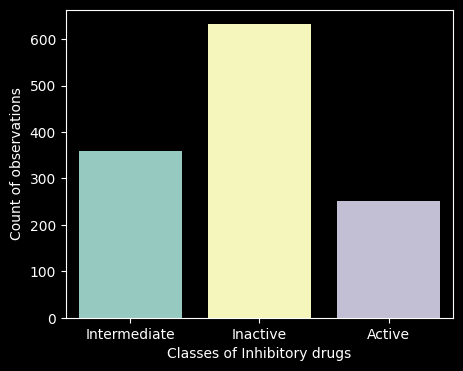

In [6]:
fig,ax = plt.subplots(figsize=(5,4))
sns.countplot(x=df.Inhib_class)
ax.set_xlabel('Classes of Inhibitory drugs')
ax.set_ylabel('Count of observations')
plt.show()

As you can see, in the above graph, among the three classes of inhibitory drugs, majority of them are inactive against MAO-A.

In [7]:
df.standard_value.max(),df.standard_value.min()

(1250000.0, 0.0049)

In [8]:
df.ligand_efficiency.head()

0    {'bei': '12.34', 'le': '0.27', 'lle': '0.67', ...
1    {'bei': '19.19', 'le': '0.38', 'lle': '2.95', ...
2    {'bei': '19.93', 'le': '0.36', 'lle': '1.19', ...
3    {'bei': '15.20', 'le': '0.30', 'lle': '1.73', ...
4    {'bei': '21.74', 'le': '0.51', 'lle': '3.07', ...
Name: ligand_efficiency, dtype: object

In [9]:
ligdf = df.dropna().copy()

In [10]:
bler = ligdf.ligand_efficiency.apply(lambda x: ast.literal_eval(x))
bler = bler.apply(pd.Series)
bler

,bei,le,lle,sei
0,12.34,0.27,0.67,9.46
1,19.19,0.38,2.95,10.55
2,19.93,0.36,1.19,26.09
3,15.20,0.30,1.73,8.36
4,21.74,0.51,3.07,19.61
...,...,...,...,...
1231,9.63,0.20,-0.15,4.37
1232,11.63,0.24,0.96,5.59
1233,10.52,0.27,0.11,6.30
1237,10.23,0.22,-0.12,3.96


In [11]:
ligdf = pd.concat([ligdf.drop('ligand_efficiency',axis=1),bler],axis=1)

In [12]:
ligdf.head()

,molecule_chembl_id,standard_value,canonical_smiles,Inhib_class,bei,le,lle,sei
0,CHEMBL156630,5470.0,C/N=C1/CCc2c1n(C)c1ccc(OC(=O)NCc3ccccc3)c(Br)c21,Intermediate,12.34,0.27,0.67,9.46
1,CHEMBL155754,1360.0,C/N=C1/CCc2c1n(C)c1ccc(OC(=O)NC)c(Cl)c21,Intermediate,19.19,0.38,2.95,10.55
2,CHEMBL348083,30800.0,CC(C)/N=C1/CCc2c1n(C)c1ccccc21,Inactive,19.93,0.36,1.19,26.09
3,CHEMBL157182,22500.0,C/N=C1/CCc2c1n(C)c1cc(Cl)c(OC(=O)NC)cc21,Inactive,15.20,0.30,1.73,8.36
4,CHEMBL160347,180.0,COc1cc(Br)c2oc(C3CCNCC3)cc2c1,Active,21.74,0.51,3.07,19.61


In [13]:
ligdf.dtypes

molecule_chembl_id     object
standard_value        float64
canonical_smiles       object
Inhib_class            object
bei                    object
le                     object
lle                    object
sei                    object
dtype: object

In [14]:
ligdf.bei = ligdf.bei.astype(float)
ligdf['le'] = ligdf['le'].astype(float)
ligdf['lle'] = ligdf['lle'].astype(float)
ligdf['sei'] = ligdf['sei'].astype(float)

In [15]:
ligdf.dtypes

molecule_chembl_id     object
standard_value        float64
canonical_smiles       object
Inhib_class            object
bei                   float64
le                    float64
lle                   float64
sei                   float64
dtype: object

In [16]:
ligdf.dropna(inplace=True)

Number of values for Standard Value: 1031 



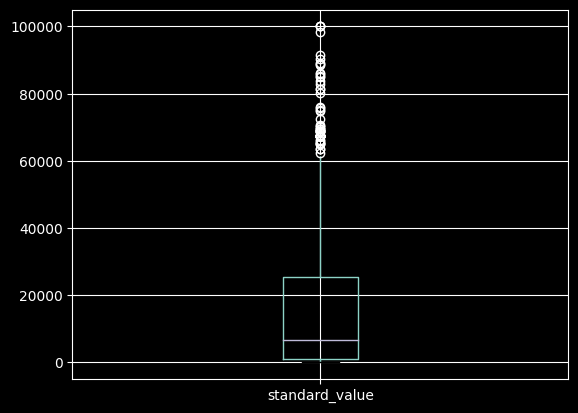

In [17]:
print("Number of values for Standard Value:",ligdf.standard_value.count(),"\n")
standard_val = ligdf.boxplot(column=['standard_value'])

Standard value represents the concentration of inhibitory drugs needed for 50% inhibition of MAO-A. Therefore lower its value, higher the potency of the drug on MAO-A. The unit we have 

Number of values for Ligand Efficiency: 1031 

Number of values for Binding Efficiency Index: 1031 

Number of values for Lipophilic Ligand Efficiency: 1031 

Number of values for Surface Binding Efficiency Index: 1031 



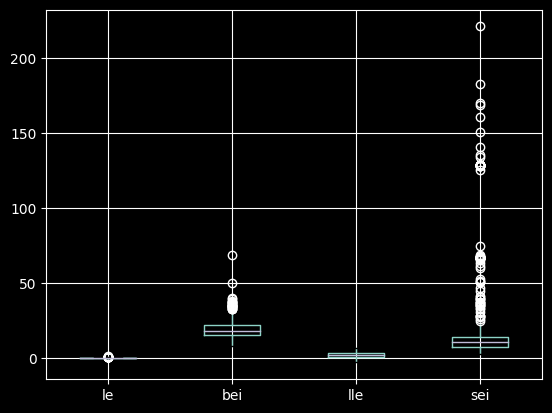

In [18]:
print("Number of values for Ligand Efficiency:",ligdf['le'].count(),"\n")
print("Number of values for Binding Efficiency Index:",ligdf.bei.count(),"\n")
print("Number of values for Lipophilic Ligand Efficiency:",ligdf.lle.count(),"\n")
print("Number of values for Surface Binding Efficiency Index:",ligdf.sei.count(),"\n")
ligeff = ligdf.boxplot(column=['le','bei','lle','sei'])

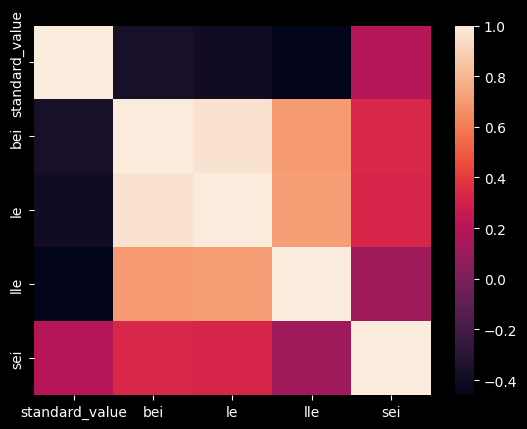

In [23]:
sns.heatmap(ligdf.drop(['molecule_chembl_id','canonical_smiles','Inhib_class'],axis=1).corr())
plt.show()

From the heatmap above, we find that the IC<sub>50</sub> standard value of inhibition is negatively correlated with Ligand efficiency, Binding efficiency index and Lipophilic Ligand efficiency, and moderately correlated for Surface efficiency index.<br>
Ligand efficiency and Binding efficiency index are very well correlated to each other. The Scatter plot below shows this correlation.

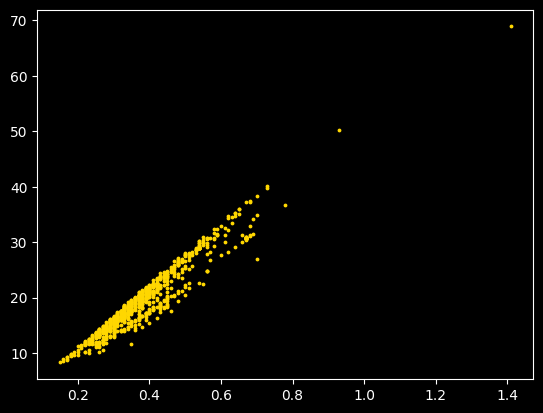

In [38]:
plt.scatter(ligdf['le'],ligdf['bei'],s=3,c='gold')
plt.show()

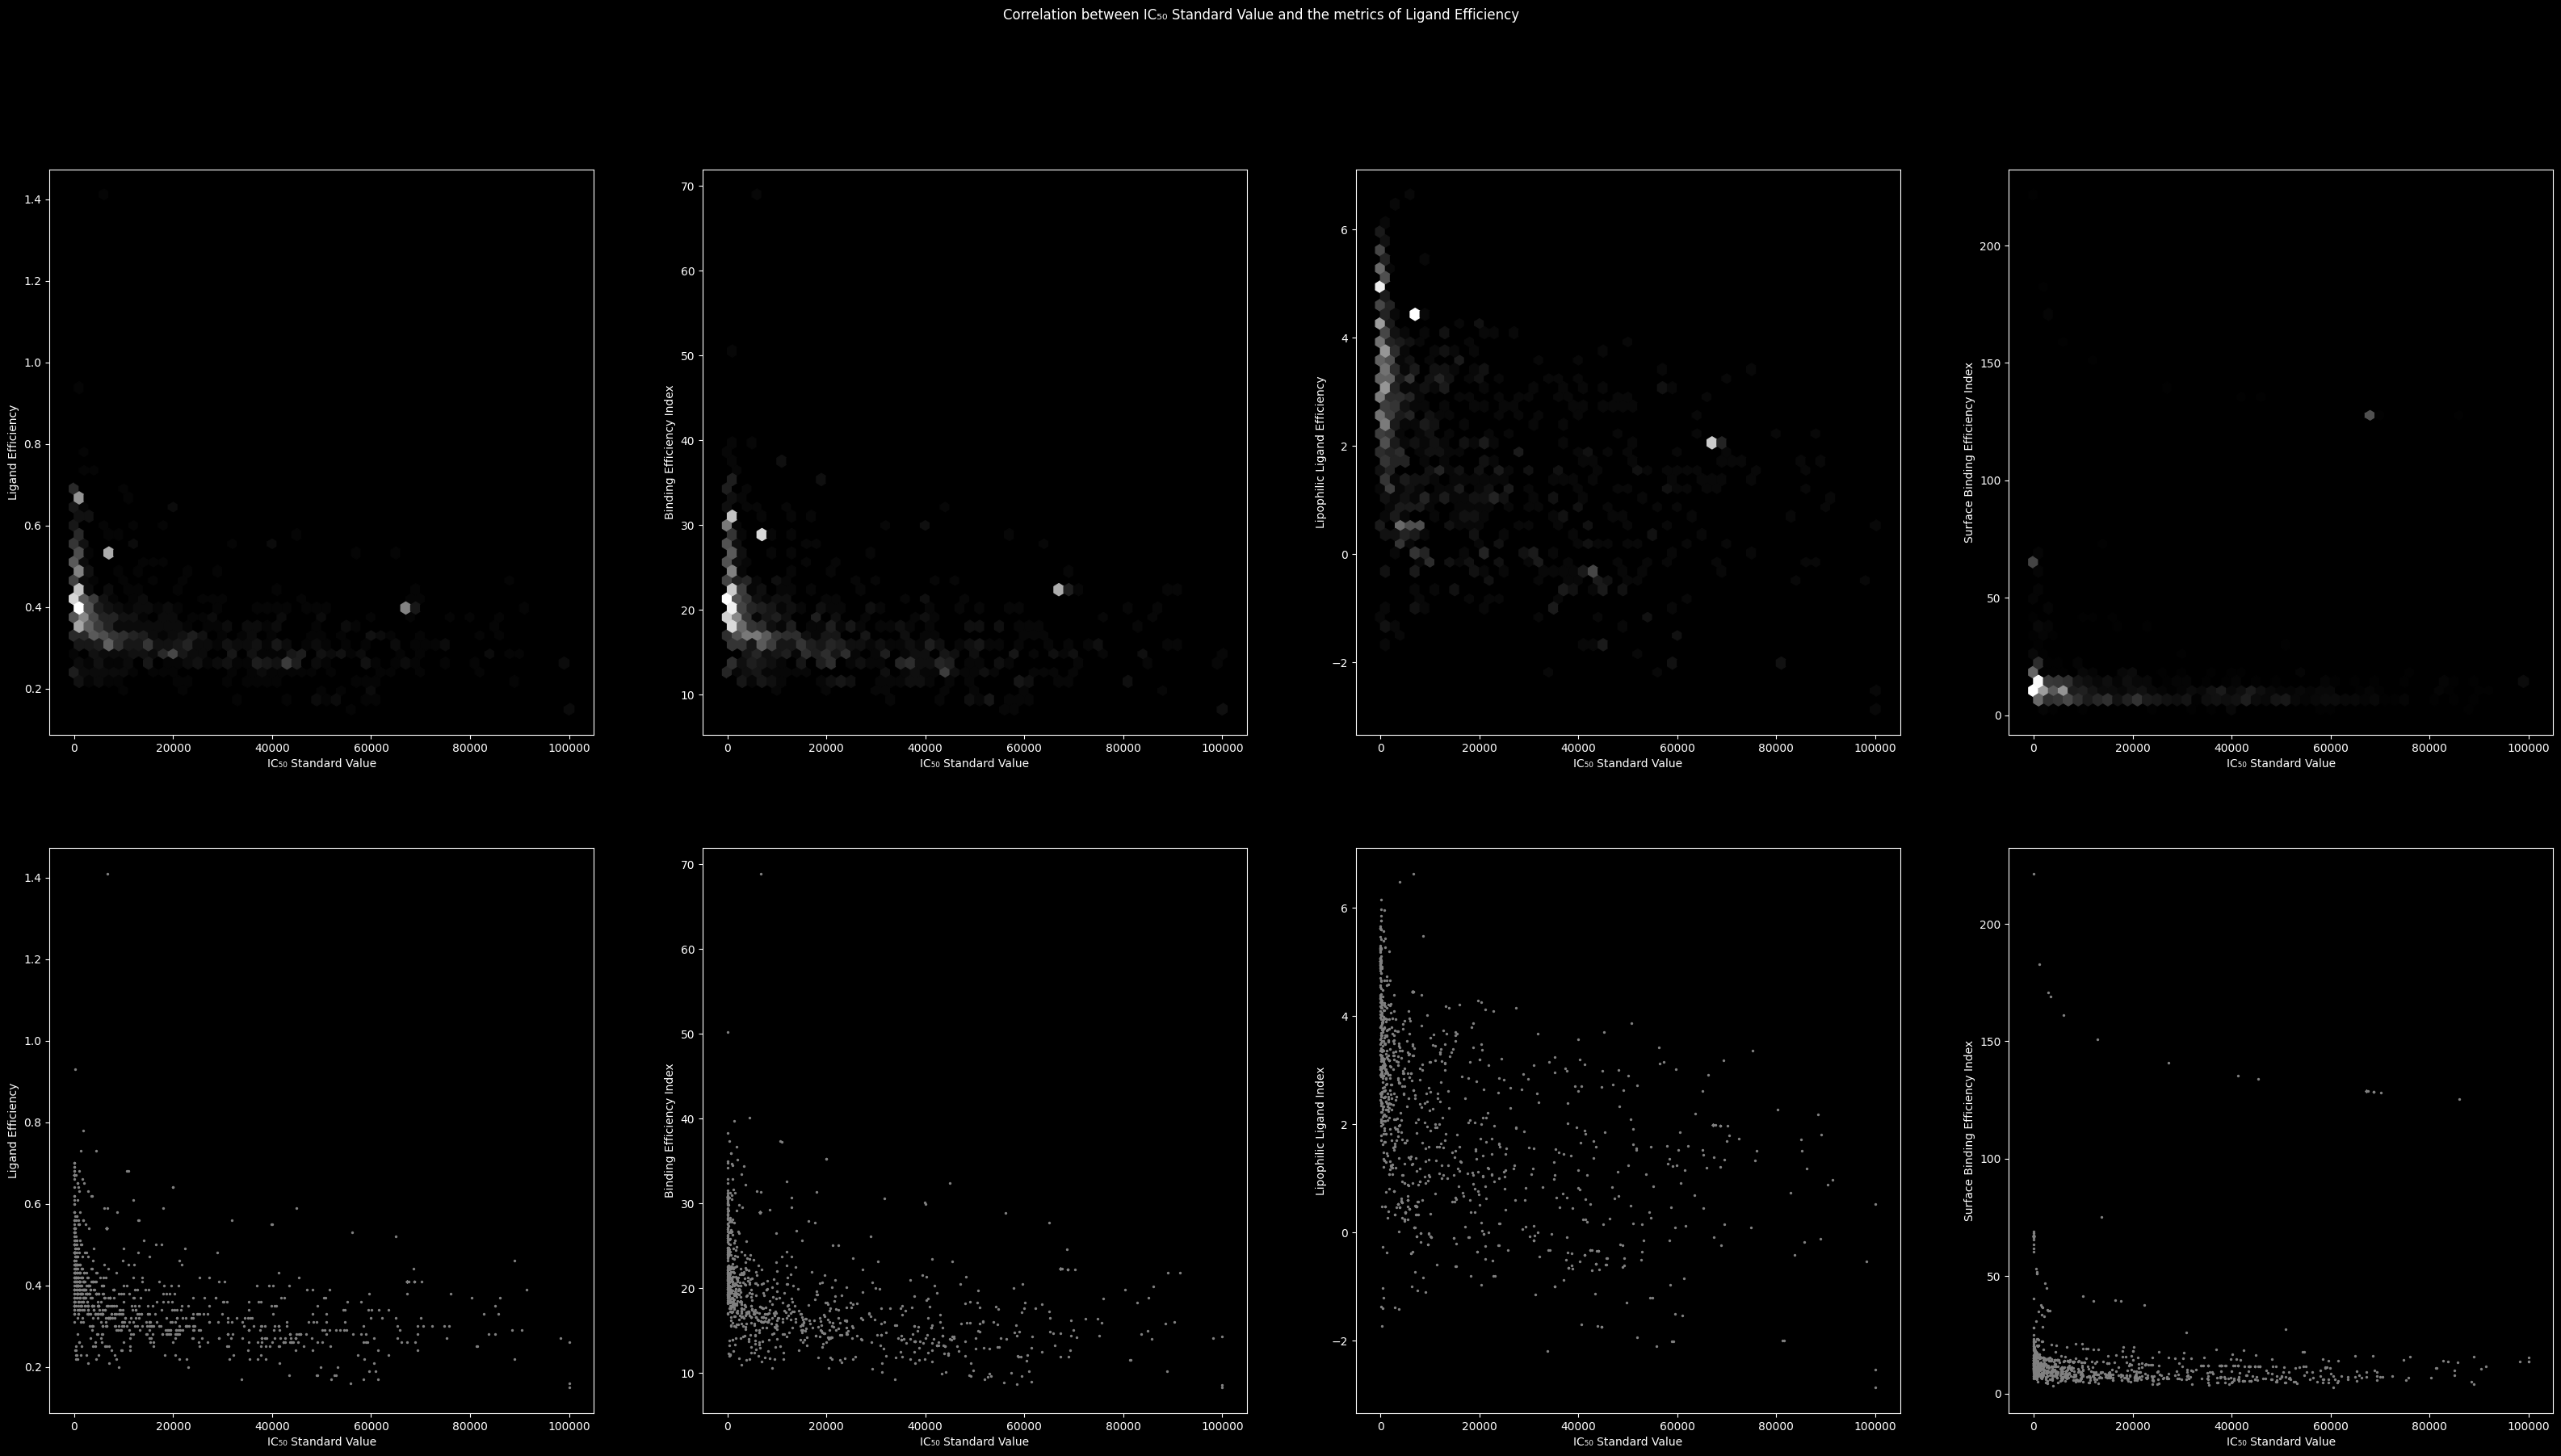

In [85]:
figs,axs = plt.subplots(2,4,figsize=(40,20))
axs[0][0].hexbin(ligdf['standard_value'],ligdf['le'],cmap='gray',gridsize=50)
axs[0][0].set_xlabel('IC\u2085\u2080 Standard Value')
axs[0][0].set_ylabel('Ligand Efficiency')

axs[0][1].hexbin(ligdf['standard_value'],ligdf['bei'],cmap='gray',gridsize=50)
axs[0][1].set_xlabel('IC\u2085\u2080 Standard Value')
axs[0][1].set_ylabel('Binding Efficiency Index')

axs[0][2].hexbin(ligdf['standard_value'],ligdf['lle'],cmap='gray',gridsize=50)
axs[0][2].set_xlabel('IC\u2085\u2080 Standard Value')
axs[0][2].set_ylabel('Lipophilic Ligand Efficiency')

axs[0][3].hexbin(ligdf['standard_value'],ligdf['sei'],cmap='gray',gridsize=50)
axs[0][3].set_xlabel('IC\u2085\u2080 Standard Value')
axs[0][3].set_ylabel('Surface Binding Efficiency Index')

axs[1][0].scatter(ligdf['standard_value'],ligdf['le'],s=2,c='grey')
axs[1][0].set_xlabel('IC\u2085\u2080 Standard Value')
axs[1][0].set_ylabel('Ligand Efficiency')

axs[1][1].scatter(ligdf['standard_value'],ligdf['bei'],s=2,c='grey')
axs[1][1].set_xlabel('IC\u2085\u2080 Standard Value')
axs[1][1].set_ylabel('Binding Efficiency Index')

axs[1][2].scatter(ligdf['standard_value'],ligdf['lle'],s=2,c='grey')
axs[1][2].set_xlabel('IC\u2085\u2080 Standard Value')
axs[1][2].set_ylabel('Lipophilic Ligand Index')

axs[1][3].scatter(ligdf['standard_value'],ligdf['sei'],s=2,c='grey')
axs[1][3].set_xlabel('IC\u2085\u2080 Standard Value')
axs[1][3].set_ylabel('Surface Binding Efficiency Index')

figs.suptitle('Correlation between IC\u2085\u2080 Standard Value and the metrics of Ligand Efficiency')
plt.show()

# Cadherin-13